In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Covariance

Our intuition then is that two random variables are dependent if the value of one of them is related to the value of the other. It is useful to quantify this dependence in order to discuss the relative dependence of multiple variables or to measure the strength of an effect (think about our testing example).

The two quanties will be *Correlation* and *Covariance*.

Consider the following extreme examples:

## Independent Random Variables

Let $Y_1$ and $Y_2$ be two independent random variables, with $Y_1$ uniform on $[0, 1]$ and $Y_2$ a normal random variable with mean 2 and standard deviation 0.5. 

We can sample these variables:

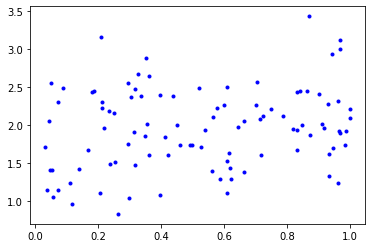

In [2]:
n = 100
sample1 = np.random.rand(n)
sample2 = np.random.normal(2, 0.5, n)

plt.plot(sample1, sample2, 'b.')

# Dependent Random Variables

Now consider two random variables with an obvious baked in dependence. Let $Y_1$ be uniformly distributed on $[0, 1]$ and let $Y_2 = 2 Y_1 + Z$ where $Z$ is an independent normal random variable with mean 1 and standard deviation 0.1.

Again we can sample these.

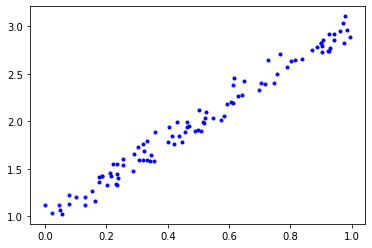

In [3]:
n=100

sample3 = np.random.rand(n)
sample4 = 2*sample3 + np.random.normal(1, 0.1, n)

plt.plot(sample3, sample4, 'b.')

In [4]:
sample4.mean()

2.0006975678555214

## Reminder: Variance

Just as a reminder that the variance of a random varialbe, is the quadratic form $ E( (Y_1 - \mu_1)^2 ) $ that gives us the mean of the squares of the displacements of the random variable from its own mean. This captures the amount of spread the value has from its mean. 

Also a reminder that using this to measure spread is a choice, one that was made so that tools from algebra and calculus could be used, and one for which with our known distributions the value turned out to be computable. If we use $ E( | Y_1 - \mu_1 |) $ this would also measure spread from the mean, but we would have fewer exact results related to it.

## Covariance Definition

In thinking about quantifying the differences in these two figures, one thing you might notice is that if you take the product of the $(y_1 - 0.5)$ and $(y_2 - 2)$ values for each point in the first picture, it looks like this number is unpredictible, and will for example be positive in some places and negative in others. Whereas in the second figure, you might notice that this quantitity is always going to be positive.

We really only have one tool for quantifying things over an entire sample or random varialbe, and that is to compute an *Expected Value*.  So we define the *covariance* of two random variables to be:

$$ \mbox{Cov}(Y_1, Y_2) = E[ (Y_1 - \mu_1) (Y_2 - \mu_2) ] $$

where $E(Y_1) = \mu_1$ and $E(Y_2) = \mu_2 $

## If $Y_1$ and $Y_2$ are Indepdent?

$$ E( g(Y_1) h(Y_2) ) = \int \int g(y_1) h(y_2) f_1(y_1) f_2(y_2) dy_1 dy_2 $$

$$ \left[ \int g(y_1) f_1(y_1) dy_1 \right] \left[ \int h(y_2) f_2(y_2) dy_2 \right] $$

## Covariance of Independent Variables

Note in the case where $Y_1$ and $Y_2$ are completely independent we get:

$$ \mbox{Cov}(Y_1, Y_2) = E[ Y_1 - \mu_1 ] E[ Y_2 - \mu_2] = 0 \cdot 0 $$

## Correlation Coefficient

Notice that the units of the Covariance are going to be the product of the units of $Y_1$ and $Y_2$ and that means it is not a good quantity for comparing the dependency of different random variables with different units. A unitless quantity with the same information would be the *correlation coefficient*

$$ \rho = \frac{\mbox{Cov}(Y_1, Y_2)}{\sqrt{\sigma_1 \sigma_2 }} $$

where $\sigma_1 = E[ (Y_1 - \mu_1)^2 ] $ and $\sigma_2 = E[ (Y_2 - \mu_2)^2 ] $

## Computing Covariance

Note that 

$$ \mbox{Cov}(Y_1, Y_2) = E(Y_1 Y_2) - E(Y_1) E(Y_2) $$

So the covariance amounts to finding the $Y_1 Y_2$ moment together with the means. 

Again we note that if the two variables are close to idependent then $E(Y_1 Y_2) $ will be close to just the product of the two means.



### Example

Let 

$$ f(y_1, y_2) = \left\{ \begin{matrix} 2 & 0\leq y_2 \leq y_1 \leq 1 \\ 0 & \mbox{otherwise} \end{matrix} \right. $$

Find $\mbox{Cov}(Y_1, Y_2)$

In [9]:
y1 = sp.Symbol('y1')
y2 = sp.Symbol('y2')

Ey1 = sp.integrate( 2*y1, (y2, 0, y1), (y1, 0, 1))
Ey1

2/3

In [19]:
sp.integrate( 2*y1, (y1, y2, 1), (y2, 0, 1) )

2/3

In [10]:
Ey2 = sp.integrate( 2*y2, (y2, 0, y1), (y1, 0, 1))
Ey2

1/3

In [11]:
Ey1y2 = sp.integrate(2*(y1*y2), (y2, 0, y1), (y1, 0, 1))
Ey1y2

1/4

In [12]:
Cov = Ey1y2 - Ey1*Ey2
Cov


1/36

### Example

Let 

$$ f(y1, y2) = \left\{ \begin{matrix} 4 y_1 y_2 & 0 \leq y_1 \leq 1, 0 \leq y_2 \leq 1 \\ 0 & \mbox{otherwise} \end{matrix} \right. $$

Find the $\mbox{Cov}(Y_1, Y_2)$.

In [13]:
Ey1 = sp.integrate( 4*y1*y2* (y1), (y1, 0, 1), (y2, 0, 1) )
Ey1

2/3

In [14]:
Ey2 = sp.integrate( 4*y1*y2* (y2), (y1, 0, 1), (y2, 0, 1) )
Ey2

2/3

In [15]:
Ey1y2 =  sp.integrate( 4*y1*y2* (y1*y2), (y1, 0, 1), (y2, 0, 1) )
Ey1y2

4/9

### Implication

This implies that if $Y_1$ and $Y_2$ are independent, then the $\mbox{Cov}(Y_1, Y_2)$ is zero. However note that the converse is not true. I.e. just because the Covariance is zero, does not mean the variables are inedpendent. See the next example.

### Example

Suppose that $Y_1$ and $Y_2$ are uniformly distributed over the triangle given by:  $-1 \leq Y_1 \leq 1 $ and $ 0 \leq Y_2 \leq 1 - |Y_1| $.

- Find the normalizing constant that makes the constant function of this region a valid PDF.
- Find the $Cov(Y_1, Y_2)$
- Find the coefficient of correlation for $Y_1$ and $Y_2$.
- Discuss:  Are $Y_1$ and $Y_2$ dependent or independent?

$$ \int_0^3 dy_1 \int_1^2 dy_2 f(y_1, y_2) $$

In [16]:
sp.integrate( y1+y2, (y1, 0, 3), (y2, 1, 2) )

9

In [18]:
sp.integrate( y1+y2, (y2, 1, 2), (y1, 0, 3) )

9